# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup, API Key, opwnweathermap API
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import random
import requests
import time
import openweathermapy as owm
from api_keys import api_key
from citipy import citipy
from datetime import datetime

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination randomly generated
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count 
len(cities)

620

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Create a settings object with your API key and preferred units
settings = {"units": "imperial", "appid": api_key}

# Initializing list to store weather data for cities 
City = []
Latitude = []
Temperature = []
Humidity =[]
WindSpeed = []
Cloudiness = []
WDate = []
Country = []

# Initializing variables to calculate Total cities found and total not found
CityNotFound=0
TotalCities = 0
# Counter to count the number of API calls as there is restriction of 60 API calls per minute as mentioned on the website.
Cnt=1 
Iter=1
# Capturing current time in variable
Start_tm = time.time()   

# Creating parameter list for details we want to pull the from weather records block
summary = ["name", "coord.lat", "main.temp_max", "main.humidity", "wind.speed", "clouds.all", "dt", "sys.country"]

for city in cities:
    try:
        print(f'Processing Record {Cnt} of Set {Iter} | {city}' )
        print(f'{owm.BASE_URL}weather?units=imperial&APPID={api_key}&q={city}')
        weather_data = owm.get_current(city, **settings)
        data = weather_data(*summary)
        City.append(data[0])
        Latitude.append(data[1])
        Temperature.append(data[2])
        Humidity.append(data[3])
        WindSpeed.append(data[4])
        Cloudiness.append(data[5])
        WDate.append(data[6])
        Country.append(data[7])
        TotalCities+=1
    except Exception as e:
        #print(f'Processing Record {Cnt} of Set {Iter} | {city1}' )
        print("City not found. Skipping...")
        CityNotFound+=1    
    Cnt+=1
    if Cnt == 51:  # Handling restriction of 60 API calls per min
        Now_Tm=time.time()
        time.sleep(60-(Now_Tm-Start_tm))
        Start_tm=time.time()
        Cnt = 1 
        Iter+=1
        
print(f'Total cities for which data is found: {TotalCities}')        
print(f'Total cities for which data is not found: {CityNotFound}')

Processing Record 1 of Set 1 | saint-philippe
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=8a4bc0b503b760f1072729efef1303cc&q=saint-philippe
Processing Record 2 of Set 1 | puerto colombia
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=8a4bc0b503b760f1072729efef1303cc&q=puerto colombia
Processing Record 3 of Set 1 | jumla
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=8a4bc0b503b760f1072729efef1303cc&q=jumla
Processing Record 4 of Set 1 | bolungarvik
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=8a4bc0b503b760f1072729efef1303cc&q=bolungarvik
City not found. Skipping...
Processing Record 5 of Set 1 | aklavik
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=8a4bc0b503b760f1072729efef1303cc&q=aklavik
Processing Record 6 of Set 1 | mount gambier
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=8a4bc0b503b760f1072729efef1303cc&q=mount gambier
Processing Record 7 of Set

Processing Record 5 of Set 2 | chuy
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=8a4bc0b503b760f1072729efef1303cc&q=chuy
Processing Record 6 of Set 2 | khair
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=8a4bc0b503b760f1072729efef1303cc&q=khair
Processing Record 7 of Set 2 | nanortalik
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=8a4bc0b503b760f1072729efef1303cc&q=nanortalik
Processing Record 8 of Set 2 | avarua
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=8a4bc0b503b760f1072729efef1303cc&q=avarua
Processing Record 9 of Set 2 | praia
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=8a4bc0b503b760f1072729efef1303cc&q=praia
Processing Record 10 of Set 2 | bluff
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=8a4bc0b503b760f1072729efef1303cc&q=bluff
Processing Record 11 of Set 2 | ketchikan
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=8a4

Processing Record 7 of Set 3 | raudeberg
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=8a4bc0b503b760f1072729efef1303cc&q=raudeberg
Processing Record 8 of Set 3 | xichang
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=8a4bc0b503b760f1072729efef1303cc&q=xichang
Processing Record 9 of Set 3 | castro
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=8a4bc0b503b760f1072729efef1303cc&q=castro
Processing Record 10 of Set 3 | armidale
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=8a4bc0b503b760f1072729efef1303cc&q=armidale
Processing Record 11 of Set 3 | upernavik
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=8a4bc0b503b760f1072729efef1303cc&q=upernavik
Processing Record 12 of Set 3 | rieti
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=8a4bc0b503b760f1072729efef1303cc&q=rieti
Processing Record 13 of Set 3 | ljaskovec
http://api.openweathermap.org/data/2.5/weather?unit

Processing Record 10 of Set 4 | kamenskoye
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=8a4bc0b503b760f1072729efef1303cc&q=kamenskoye
City not found. Skipping...
Processing Record 11 of Set 4 | polyarnyy
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=8a4bc0b503b760f1072729efef1303cc&q=polyarnyy
Processing Record 12 of Set 4 | pringsewu
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=8a4bc0b503b760f1072729efef1303cc&q=pringsewu
Processing Record 13 of Set 4 | mahanje
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=8a4bc0b503b760f1072729efef1303cc&q=mahanje
City not found. Skipping...
Processing Record 14 of Set 4 | anadyr
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=8a4bc0b503b760f1072729efef1303cc&q=anadyr
Processing Record 15 of Set 4 | zachagansk
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=8a4bc0b503b760f1072729efef1303cc&q=zachagansk
City not found. Skip

Processing Record 13 of Set 5 | mango
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=8a4bc0b503b760f1072729efef1303cc&q=mango
Processing Record 14 of Set 5 | bambous virieux
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=8a4bc0b503b760f1072729efef1303cc&q=bambous virieux
Processing Record 15 of Set 5 | taurage
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=8a4bc0b503b760f1072729efef1303cc&q=taurage
Processing Record 16 of Set 5 | cherskiy
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=8a4bc0b503b760f1072729efef1303cc&q=cherskiy
Processing Record 17 of Set 5 | nome
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=8a4bc0b503b760f1072729efef1303cc&q=nome
Processing Record 18 of Set 5 | poyarkovo
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=8a4bc0b503b760f1072729efef1303cc&q=poyarkovo
Processing Record 19 of Set 5 | college
http://api.openweathermap.org/data/2.5/wea

Processing Record 16 of Set 6 | bandarbeyla
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=8a4bc0b503b760f1072729efef1303cc&q=bandarbeyla
Processing Record 17 of Set 6 | tautira
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=8a4bc0b503b760f1072729efef1303cc&q=tautira
Processing Record 18 of Set 6 | darhan
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=8a4bc0b503b760f1072729efef1303cc&q=darhan
Processing Record 19 of Set 6 | bathsheba
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=8a4bc0b503b760f1072729efef1303cc&q=bathsheba
Processing Record 20 of Set 6 | okhotsk
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=8a4bc0b503b760f1072729efef1303cc&q=okhotsk
Processing Record 21 of Set 6 | ugoofaaru
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=8a4bc0b503b760f1072729efef1303cc&q=ugoofaaru
Processing Record 22 of Set 6 | bredasdorp
http://api.openweathermap.org/data/2.

Processing Record 19 of Set 7 | diffa
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=8a4bc0b503b760f1072729efef1303cc&q=diffa
Processing Record 20 of Set 7 | sabzevar
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=8a4bc0b503b760f1072729efef1303cc&q=sabzevar
Processing Record 21 of Set 7 | makakilo city
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=8a4bc0b503b760f1072729efef1303cc&q=makakilo city
Processing Record 22 of Set 7 | baherden
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=8a4bc0b503b760f1072729efef1303cc&q=baherden
Processing Record 23 of Set 7 | umea
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=8a4bc0b503b760f1072729efef1303cc&q=umea
Processing Record 24 of Set 7 | abu samrah
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=8a4bc0b503b760f1072729efef1303cc&q=abu samrah
Processing Record 25 of Set 7 | dibaya
http://api.openweathermap.org/data/2.5/weat

Processing Record 22 of Set 8 | virginia beach
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=8a4bc0b503b760f1072729efef1303cc&q=virginia beach
Processing Record 23 of Set 8 | barrhead
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=8a4bc0b503b760f1072729efef1303cc&q=barrhead
Processing Record 24 of Set 8 | saleaula
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=8a4bc0b503b760f1072729efef1303cc&q=saleaula
City not found. Skipping...
Processing Record 25 of Set 8 | kununurra
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=8a4bc0b503b760f1072729efef1303cc&q=kununurra
Processing Record 26 of Set 8 | la ronge
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=8a4bc0b503b760f1072729efef1303cc&q=la ronge
Processing Record 27 of Set 8 | houma
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=8a4bc0b503b760f1072729efef1303cc&q=houma
Processing Record 28 of Set 8 | minab
http://a

Processing Record 24 of Set 9 | sambava
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=8a4bc0b503b760f1072729efef1303cc&q=sambava
Processing Record 25 of Set 9 | porec
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=8a4bc0b503b760f1072729efef1303cc&q=porec
Processing Record 26 of Set 9 | adana
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=8a4bc0b503b760f1072729efef1303cc&q=adana
Processing Record 27 of Set 9 | acapulco
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=8a4bc0b503b760f1072729efef1303cc&q=acapulco
Processing Record 28 of Set 9 | west plains
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=8a4bc0b503b760f1072729efef1303cc&q=west plains
Processing Record 29 of Set 9 | baikunthpur
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=8a4bc0b503b760f1072729efef1303cc&q=baikunthpur
Processing Record 30 of Set 9 | qaqortoq
http://api.openweathermap.org/data/2.5/weat

Processing Record 27 of Set 10 | paso de carrasco
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=8a4bc0b503b760f1072729efef1303cc&q=paso de carrasco
Processing Record 28 of Set 10 | tumannyy
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=8a4bc0b503b760f1072729efef1303cc&q=tumannyy
City not found. Skipping...
Processing Record 29 of Set 10 | ashland
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=8a4bc0b503b760f1072729efef1303cc&q=ashland
Processing Record 30 of Set 10 | poso
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=8a4bc0b503b760f1072729efef1303cc&q=poso
Processing Record 31 of Set 10 | solnechnyy
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=8a4bc0b503b760f1072729efef1303cc&q=solnechnyy
Processing Record 32 of Set 10 | basco
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=8a4bc0b503b760f1072729efef1303cc&q=basco
Processing Record 33 of Set 10 | amberg
http

Processing Record 30 of Set 11 | emba
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=8a4bc0b503b760f1072729efef1303cc&q=emba
Processing Record 31 of Set 11 | pousat
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=8a4bc0b503b760f1072729efef1303cc&q=pousat
City not found. Skipping...
Processing Record 32 of Set 11 | terekli-mekteb
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=8a4bc0b503b760f1072729efef1303cc&q=terekli-mekteb
Processing Record 33 of Set 11 | badaojiang
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=8a4bc0b503b760f1072729efef1303cc&q=badaojiang
City not found. Skipping...
Processing Record 34 of Set 11 | attawapiskat
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=8a4bc0b503b760f1072729efef1303cc&q=attawapiskat
City not found. Skipping...
Processing Record 35 of Set 11 | kavadarci
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=8a4bc0b503b760f1072729e

Processing Record 33 of Set 12 | candawaga
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=8a4bc0b503b760f1072729efef1303cc&q=candawaga
City not found. Skipping...
Processing Record 34 of Set 12 | muros
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=8a4bc0b503b760f1072729efef1303cc&q=muros
Processing Record 35 of Set 12 | maldonado
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=8a4bc0b503b760f1072729efef1303cc&q=maldonado
Processing Record 36 of Set 12 | rawannawi
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=8a4bc0b503b760f1072729efef1303cc&q=rawannawi
City not found. Skipping...
Processing Record 37 of Set 12 | luziania
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=8a4bc0b503b760f1072729efef1303cc&q=luziania
Processing Record 38 of Set 12 | kuandian
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=8a4bc0b503b760f1072729efef1303cc&q=kuandian
Processing Record 39

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
# Creating DataFrame
weather_df = pd.DataFrame({"City": City,
                          "Latitude": Latitude,
                          "Temperature": Temperature,
                          "Humidity": Humidity,
                          "WindSpeed": WindSpeed,
                          "Cloudiness":Cloudiness,
                          "Date" : WDate,
                          "Country": Country})

# Save to csv file
weather_df.to_csv(output_data_file, encoding='utf-8', index=False)

# Display the counts from Dataframe
weather_df.count()

# Display the Dataframe  (cities count different with each run but always more than 500 so no further check is put)
weather_df[["City", "Cloudiness", "Country", "Date", "Humidity", "Latitude", "Temperature", "WindSpeed"]].head()

,City,Cloudiness,Country,Date,Humidity,Latitude,Temperature,WindSpeed
0,Saint-Philippe,1,CA,1537653600,47,45.36,57.20,9.17
1,Puerto Colombia,75,CO,1537650000,100,10.99,75.20,2.24
2,Jumla,100,NP,1537654938,92,29.28,36.68,2.28
3,Aklavik,75,CA,1537653600,86,68.22,42.80,8.05
4,Mount Gambier,12,AU,1537654939,89,-37.83,48.11,5.41


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

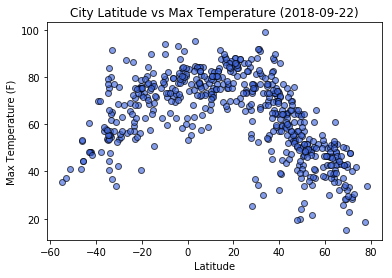

In [13]:
plt.scatter(weather_df["Latitude"], weather_df["Temperature"], color="royalblue", edgecolor="black", alpha=0.65)
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title(f'City Latitude vs Max Temperature ({datetime.now().date()})')
plt.savefig("LatitudeVsTemperature.png")
plt.show()

#### Latitude vs. Humidity Plot

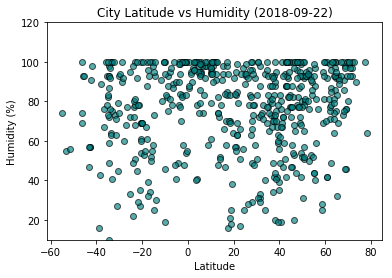

In [14]:
plt.scatter(weather_df["Latitude"], weather_df["Humidity"], color="teal", edgecolor="black", alpha=0.65)
plt.ylim(10,120)    # Had to give this to remove one data point plotted at 300% humidity around the equator
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title(f'City Latitude vs Humidity ({datetime.now().date()})')
plt.savefig("LatitudeVsHumidity.png")
plt.show()

#### Latitude vs. Cloudiness Plot

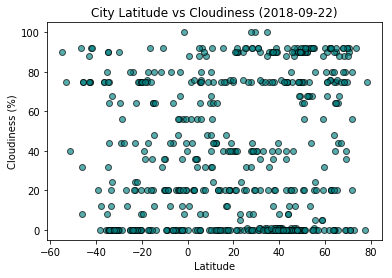

In [11]:
plt.scatter(weather_df["Latitude"], weather_df["Cloudiness"], color="teal", edgecolor="black", alpha=0.65)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title(f'City Latitude vs Cloudiness ({datetime.now().date()})')
plt.savefig("LatitudeVsCloudiness.png")
plt.show()

#### Latitude vs. Wind Speed Plot

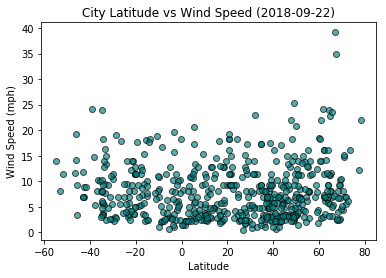

In [10]:
plt.scatter(weather_df["Latitude"], weather_df["WindSpeed"], color="teal", edgecolor="black", alpha=0.65)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title(f'City Latitude vs Wind Speed ({datetime.now().date()})')
plt.savefig("LatitudeVsWindSpeed.png")
plt.show()